#Notebook 3A: Interpretability of Machine Learning Models: Shapley Values
Organized and Conceptualized by Christopher Monterola

This notebook is guided by the following references:

1. Christoph Molnar, Interpretable Machine Learning:A Guide for Making Black Box Models Explainable, 2019 and updated August 2023: https://christophm.github.io/interpretable-ml-book/.
2. Counterfactual Explanations for Machine Learning:
A Review, 2020. https://ml-retrospectives.github.io/neurips2020/camera_ready/5.pdf
3.  https://towardsdatascience.com/introducing-shap-decision-plots-52ed3b4a1cba
4. ChatGPT prompts

Interpretability of machine learning models is an essential aspect of both model development and communication with stakeholders.  Interpretability refers to the ability to comprehend and explain how a machine learning model arrives at its decisions or predictions. Many real-world applications where interpretability is super critical includes healthcare, finance, and legal domains.

In this notebook, we will look at various methods how to come up with a sensible interpretation of a ML model and emphasize its critical role to satisfy stakeholders' concerns.

#1. Introduction

Interpretability is not merely technical detail but a fundamental requirement for responsible and effective machine learning deployment. It fosters understanding, trust, informed decision-making, and model robustness, all of which are indispensable in harnessing the power of AI for solving complex real-world problems.

## 1.1 The Importance of Interpretability

 Below are several compelling reasons underscore why that is the case:

**1.1.1 Model Understanding:**
Interpretability is the gateway to understanding how a machine learning model functions. When we deploy models in real-world applications, it's not sufficient to know that a model works; we need to comprehend why and how it works. This understanding allows data scientists, domain experts, and stakeholders to gain insights into the underlying patterns, relationships, and biases captured by the model. It enables us to identify model limitations, strengths, and areas for improvement.

**1.1.2 Trust and Accountability:**
Interpretability is a cornerstone of trust in machine learning. In many high-stakes applications, such as healthcare, finance, and autonomous vehicles, it is essential to have confidence in the decisions made by AI systems. Transparency and interpretability build trust among end-users, regulators, and the general public. If a machine learning model can explain its predictions, it becomes more accountable, and stakeholders can scrutinize its behavior for fairness, ethics, and compliance with regulations.

**1.1.3 Decision-Making:**
Interpretability empowers decision-makers to rely on AI-driven insights when making critical choices. In fields like medicine, where machine learning aids in diagnosis or finance, which assists in investment decisions, interpretability ensures that recommendations align with human expertise. It allows experts to validate model recommendations and make informed decisions, leading to better outcomes.

**1.1.4 Debugging and Robustness:**
Interpretability plays a vital role in model debugging and improving robustness. When a model produces unexpected or erroneous results, interpretability tools can help identify the root causes, such as data quality issues, feature importance, or model biases. This diagnostic capability is essential for refining models and ensuring their reliability in dynamic real-world environments.



## 1.2 Three levels of interpretability

In general, there are three levels of interpretability, these are:

**1.2.1 Model-level:** Understanding how the model as a whole makes predictions.

*Illustration:* Suppose you are using a random forest model to predict credit card fraud. Model-level interpretability might involve understanding that the model combines the results of many decision trees and that it gives more weight to the most important features, like transaction amount, location, and user behavior patterns, to make decisions. Tools like global feature importance can be used to explain which features are most influential in the model’s overall decision-making.

**1.2.2 Feature-level:** Understanding the impact of individual features on predictions.

*Illustration:* In a house price prediction model, feature-level interpretability might tell you that the feature “square footage” has a strong positive influence on predicting higher house prices, while “distance from city center” negatively impacts the prediction. Feature-level explanations often rely on tools like SHAP values, which show how changing a particular feature affects the model’s output.

A well-known example is the Iris dataset (recall from ML1). When calculating feature importance, the results clearly show that petal features are stronger predictors than sepal features in determining the species classification.

| Feature           | Importance |
|-------------------|------------|
| petal width (cm)  | 0.432125   |
| petal length (cm) | 0.407743   |
| sepal length (cm) | 0.116498   |
| sepal width (cm)  | 0.043634   |


**1.2.3 Instance-level:** Explaining specific predictions for given input data.

*Illustration:* For a loan approval model, instance-level interpretability could explain why a specific applicant was denied a loan. The explanation might indicate that the decision was based on that person's low credit score and high debt-to-income ratio. Tools like LIME (Local Interpretable Model-agnostic Explanations) or SHAP can break down the individual prediction, showing the contribution of each feature to that particular outcome. You will learn this in this Notebook and the supplementary notebook (Notebook 3 Supplementary).


# Section 2. Shapley Values

Shapley values are a concept borrowed from cooperative game theory and adapted for machine learning to explain how each feature contributes to a prediction. It was named in honor of Lloyd Shapley, who introduced it in 1951 and won the Nobel Memorial Prize in Economic Sciences in 2012 (Yes, 61 years later, took 3 generations for this world to appreciate the beauty of Shapley`s mathematics!!!). Shapley values provide a systematic and fair way to distribute the "credit" or importance among individual features in a prediction.

In cooperative game theory, players in a coalition work together to achieve a goal and receive a reward. The goal is to determine how to distribute the total reward among the players fairly.

In the context of machine learning, think of each feature in a dataset as a "player" in the game. The "reward" or "payoff" corresponds to the prediction made by a machine learning model for a specific input or data point.
The Shapley Value Calculation:

Shapley values calculate the contribution of each feature to a prediction by considering all possible combinations of features. For a given prediction, Shapley values quantify how much each feature adds or subtracts from its expected value when included in a coalition (combination of features). Shapley values ensure that the contributions are fairly distributed among the features, considering their interactions and dependencies.



## 2.1 Steps in Shapley Value Calculation:

Hear are the steps in calculating the Shapley Values

**a. Generate All Possible Feature Combinations:** Start by considering all possible combinations of features. This includes combinations where a feature is present and where it is absent.

**b. Calculate the Prediction Contribution:** For each combination, calculate the model's prediction. In each combination, vary the order in which the features are added to account for different sequences.
Determine how much each feature's addition or removal affects the prediction.

**c. Average Contributions Across All Combinations:** Calculate the average contribution of each feature across all combinations.
This average contribution represents the Shapley value for that feature.
Interpretation:

Higher Shapley values indicate that a feature has a more significant impact on predictions.

Features with positive Shapley values contribute positively to the prediction, while those with negative values have a negative impact. Features with Shapley values near zero have little influence on the prediction.

Below we illustrate using example how it is calculated, step per step. You can find in Appendix A the compact mathematical expression for the illustration below. The math won Shapley the prize in 2012, 61 years after he first proposed the idea!

## 2.2 Illustrations

Here I provide a step by step example on how Shapley values are computed. I will consider 4 illustrations to clearly outline how the equations in Appendix A are computed.

### **Illustration 1:** Shapley in Regression Model, Collaborative Project of Chris, K-Ann and Leo with Shapley Values

Let's consider a collaborative project involving Chris, K-Ann, and Leo. They are working together on a product, yielding a profit of ₱100. The objective is to fairly distribute this profit based on individual contributions.



### Individual Contributions

- **Chris**: Generates ₱30 alone.
- **K-Ann**: Generates ₱40 alone.
- **Leo**: Generates ₱20 alone.

### Combined Contributions

- **Chris and K-Ann**: Together, they generate ₱70.
- **Chris and Leo**: Together, they generate ₱50.
- **K-Ann and Leo**: Together, they generate ₱60.
- **All Three**: Together, they generate ₱100.




### Shapley Value Calculations

###**Chris**

We calculate Chris' marginal contributions across all possible coalitions:

1. **Chris alone**: ₱30.
2. **Joining K-Ann**: Chris increases the value from ₱40 (K-Ann alone) to ₱70 (Chris and K-Ann), a contribution of **₱30**.
3. **Joining Leo**: Chris increases the value from ₱20 (Leo alone) to ₱50 (Chris and Leo), a contribution of **₱30**.
4. **Joining last after K-Ann and Leo**: Chris increases the value from ₱60 (K-Ann and Leo together) to ₱100 (all three), a contribution of **₱40**.

Shapley value for Chris:

$$
\text{Average Contribution} = \frac{30 + 30 + 30 + 40}{4} = \text{₱32.5}.
$$


###**K-Ann**

Now calculate K-Ann’s marginal contributions across all possible coalitions:

1. **K-Ann alone**: ₱40.
2. **Joining Chris**: K-Ann increases the value from ₱30 (Chris alone) to ₱70 (Chris and K-Ann), a contribution of **₱40**.
3. **Joining Leo**: K-Ann increases the value from ₱20 (Leo alone) to ₱60 (K-Ann and Leo), a contribution of **₱40**.
4. **Joining last after Chris and Leo**: K-Ann increases the value from ₱50 (Chris and Leo together) to ₱100 (all three), a contribution of **₱30**.

Shapley value for K-Ann:

$$
\text{Average Contribution} = \frac{40 + 40 + 40 + 30}{4} = \text{₱37.5}.
$$

### **Leo**

Finally, calculate Leo’s marginal contributions across all possible coalitions:

1. **Leo alone**: ₱20.
2. **Joining Chris**: Leo increases the value from ₱30 (Chris alone) to ₱50 (Chris and Leo), a contribution of **₱20**.
3. **Joining K-Ann**: Leo increases the value from ₱40 (K-Ann alone) to ₱60 (K-Ann and Leo), a contribution of **₱20**.
4. **Joining last after Chris and K-Ann**: Leo increases the value from ₱70 (Chris and K-Ann together) to ₱100 (all three), a contribution of **₱30**.

Shapley value for Leo:

$$
\text{Average Contribution} = \frac{20 + 20 + 20 + 30}{4} = \text{₱22.5}.
$$
### Distribution Based on Shapley Values

- **Chris**: Receives ₱32.5.
- **K-Ann**: Receives ₱37.5.
- **Leo**: Receives ₱22.5.

This method ensures each member is rewarded based on their marginal contribution to the total outcome, considering all possible coalition orders.


This method ensures each member is rewarded based on their marginal contribution to the project, considering all possible formation orders of the coalition.


###**Illustration 2.** Shapley in Regression Model, Calculation of Shapley Values based on a simple "black box" machine learning model

We have a machine learning model predicting house prices based on three features: `Size`, `Location`, and `Age`. We'll calculate the Shapley value for each feature to understand their contributions to the predicted price.

### Contributions

1. **Individual Contributions:**
   - `Size`: 30
   - `Location`: 50
   - `Age`: 20

2. **Combined Contributions:**
   - `Size + Location`: 70
   - `Size + Age`: 40
   - `Location + Age`: 60
   - `Size + Location + Age`: 100

### Shapley Value Calculation

#### For `Size`:

- Alone: 30
- **With `Location`**: The coalition `{Location}` has a value of 50, and the coalition `{Size, Location}` has a value of 70. Therefore, `Size`'s marginal contribution when joining `Location` is **20** (70 - 50).
- **With `Age`**: The coalition `{Age}` has a value of 20, and the coalition `{Size, Age}` has a value of 40. Therefore, `Size`'s marginal contribution when joining `Age` is **20** (40 - 20).
- **Last to join `Location` and `Age`**: The coalition `{Location, Age}` has a value of 60, and when `Size` joins, the value increases to 100. Therefore, `Size`'s marginal contribution in this case is **40** (100 - 60).
- **Average Contribution**:
  $$
  \frac{(30 + 20 + 20 + 40)}{4} = 27.5
  $$

#### For `Location`:

- Alone: 50
- **With `Size`**: The coalition `{Size}` has a value of 30, and the coalition `{Size, Location}` has a value of 70. Therefore, `Location`'s marginal contribution when joining `Size` is **40** (70 - 30).
- **With `Age`**: The coalition `{Age}` has a value of 20, and the coalition `{Location, Age}` has a value of 60. Therefore, `Location`'s marginal contribution when joining `Age` is **40** (60 - 20).
- **Last to join `Size` and `Age`**: The coalition `{Size, Age}` has a value of 40, and when `Location` joins, the value increases to 100. Therefore, `Location`'s marginal contribution in this case is **60** (100 - 40).
- **Average Contribution**:
  $$
  \frac{(50 + 40 + 40 + 60)}{4} = 47.5
  $$

#### For `Age`:

- Alone: 20
- **With `Size`**: The coalition `{Size}` has a value of 30, and the coalition `{Size, Age}` has a value of 40. Therefore, `Age`'s marginal contribution when joining `Size` is **10** (40 - 30).
- **With `Location`**: The coalition `{Location}` has a value of 50, and the coalition `{Location, Age}` has a value of 60. Therefore, `Age`'s marginal contribution when joining `Location` is **10** (60 - 50).
- **Last to join `Size` and `Location`**: The coalition `{Size, Location}` has a value of 70, and when `Age` joins, the value increases to 100. Therefore, `Age`'s marginal contribution in this case is **30** (100 - 70).
- **Average Contribution**:
  $$
  \frac{(20 + 10 + 10 + 30)}{4} = 17.5
  $$

### Shapley Values Summary

- **`Size`**: ₱27.5
- **`Location`**: ₱47.5
- **`Age`**: ₱17.5

### Interpretation

- `Location` is the most valuable feature, contributing the most to the combined prediction.
- `Size` is the second most important feature.
- `Age` contributes the least, but still adds value.

These Shapley values provide insights into the relative importance of each feature in the model’s predictive power. Note that the Shapley value method is **model-agnostic**, meaning it works independently of the specific machine learning model used, focusing only on the input-output relationships.



### **Illustration 3**. Shapley in Classification Model, Probability of being "Hired" or "Not Hired"

In this example, we'll illustrate the concept of Shapley values for feature importance using a binary classification problem. We'll use two features, "Experience" and "Education Level," to predict whether a job applicant gets hired ("Hired" or "Not Hired").

### Shapley Values Example in Google Colab

In this example, we'll illustrate the concept of Shapley values for feature importance using a binary classification problem. We'll use two features, "Experience" and "Education Level," to predict whether a job applicant gets hired ("Hired" or "Not Hired").

### Features and Binary Target

**Features:**
1. **Experience**: The number of years of work experience the applicant has.
2. **Education Level**: The highest level of education attained by the applicant (e.g., High School, Bachelor's, Master's).

**Binary Target:**
- **Hired**: 1 (Applicant was hired)
- **Not Hired**: 0 (Applicant was not hired)

### Step-by-Step Computation of Shapley Values

Shapley values are computed by considering all permutations of features and their marginal contributions in every coalition. Here, we will go through two permutations to calculate the Shapley values for the features "Experience" and "Education Level."

---

### **Permutation 1: ("Experience", "Education Level")**

#### Coalitions and Model Predictions:

1. **Coalition 1** (empty):  
   - Model predicts P(Hired) = 0.3 (baseline prediction)
   
2. **Coalition 2** ("Experience"):  
   - Model predicts P(Hired | Experience) = 0.6
   
3. **Coalition 3** ("Education Level"):  
   - Model predicts P(Hired | Education Level) = 0.5
   
4. **Coalition 4** ("Experience", "Education Level"):  
   - Model predicts P(Hired | Experience, Education Level) = 0.7

#### Marginal Contributions:

- Marginal contribution of "Experience" in Coalition 2:  
  0.6 - 0.3 = 0.3
- Marginal contribution of "Education Level" in Coalition 3:  
  0.5 - 0.3 = 0.2
- Marginal contribution of "Experience" in Coalition 4:  
  0.7 - 0.6 = 0.1
- Marginal contribution of "Education Level" in Coalition 4:  
  0.7 - 0.5 = 0.2

#### Shapley Values:

- **Shapley value of "Experience"** = (0.3 + 0.1) / 2 = **0.2**
- **Shapley value of "Education Level"** = (0.2 + 0.2) / 2 = **0.2**

---

### **Permutation 2: ("Education Level", "Experience")**

#### Coalitions and Model Predictions:

1. **Coalition 1** (empty):  
   - Model predicts P(Hired) = 0.3 (baseline prediction)
   
2. **Coalition 2** ("Education Level"):  
   - Model predicts P(Hired | Education Level) = 0.5
   
3. **Coalition 3** ("Experience"):  
   - Model predicts P(Hired | Experience) = 0.6
   
4. **Coalition 4** ("Education Level", "Experience"):  
   - Model predicts P(Hired | Education Level, Experience) = 0.7

#### Marginal Contributions:

- Marginal contribution of "Education Level" in Coalition 2:  
  0.5 - 0.3 = 0.2
- Marginal contribution of "Experience" in Coalition 3:  
  0.6 - 0.3 = 0.3
- Marginal contribution of "Education Level" in Coalition 4:  
  0.7 - 0.5 = 0.2
- Marginal contribution of "Experience" in Coalition 4:  
  0.7 - 0.6 = 0.1

#### Shapley Values:

- **Shapley value of "Education Level"** = (0.2 + 0.2) / 2 = **0.2**
- **Shapley value of "Experience"** = (0.3 + 0.1) / 2 = **0.2**

---

### **Summary of Shapley Values:**

In this example, both permutations result in the same Shapley values:
- **Shapley value of "Experience"** = 0.2
- **Shapley value of "Education Level"** = 0.2

This indicates that both features have an equal contribution to the model's predictions of whether a job applicant gets hired.

### Interpretation:

- Both **Experience** and **Education Level** contribute equally to the decision-making process in this specific model.
- The Shapley values provide a fair and consistent way to interpret the contribution of features to the model's predictions.



###**Illustration 4.** Classification with 3 features, let's include school reputation as another feature for the probability of being "Hired" or "Not Hired"



For three features, there are six possible permutations. Here are all the permutations:

1. ("Experience", "Education Level", "School Reputation")
2. ("Experience", "School Reputation", "Education Level")
3. ("Education Level", "Experience", "School Reputation")
4. ("Education Level", "School Reputation", "Experience")
5. ("School Reputation", "Experience", "Education Level")
6. ("School Reputation", "Education Level", "Experience")

Each permutation represents a different order in which the features are considered. We need to calculate the Shapley values for each of these six permutations to account for all possible orders.

Let's recalculate the Shapley values for each permutation:

#### Permutation 1: ("Experience", "Education Level", "School Reputation")

## Step-by-Step Computation of Shapley Values

#### Coalitions:

- Coalition 1: (empty coalition)
- Coalition 2: ("Experience")
- Coalition 3: ("Education Level")
- Coalition 4: ("School Reputation")
- Coalition 5: ("Experience", "Education Level")
- Coalition 6: ("Experience", "School Reputation")
- Coalition 7: ("Education Level", "School Reputation")
- Coalition 8: ("Experience", "Education Level", "School Reputation")

#### Model Predictions:

- Coalition 1: Model predicts P(Hired) = 0.3 (baseline prediction)
- Coalition 2: Model predicts P(Hired | Experience) = 0.6
- Coalition 3: Model predicts P(Hired | Education Level) = 0.5
- Coalition 4: Model predicts P(Hired | School Reputation) = 0.4
- Coalition 5: Model predicts P(Hired | Experience, Education Level) = 0.7
- Coalition 6: Model predicts P(Hired | Experience, School Reputation) = 0.65
- Coalition 7: Model predicts P(Hired | Education Level, School Reputation) = 0.55
- Coalition 8: Model predicts P(Hired | Experience, Education Level, School Reputation) = 0.75

#### Marginal Contributions:

- Marginal contribution of "Experience" in Coalition 2: 0.6 - 0.3 = 0.3
- Marginal contribution of "Education Level" in Coalition 3: 0.5 - 0.3 = 0.2
- Marginal contribution of "School Reputation" in Coalition 4: 0.4 - 0.3 = 0.1
- Marginal contribution of "Experience" in Coalition 5: 0.7 - 0.6 = 0.1
- Marginal contribution of "Experience" in Coalition 6: 0.65 - 0.6 = 0.05
- Marginal contribution of "School Reputation" in Coalition 6: 0.65 - 0.4 = 0.25
- Marginal contribution of "Education Level" in Coalition 7: 0.55 - 0.5 = 0.05
- Marginal contribution of "School Reputation" in Coalition 7: 0.55 - 0.4 = 0.15
- Marginal contribution of "Experience" in Coalition 8: 0.75 - 0.7 = 0.05
- Marginal contribution of "Education Level" in Coalition 8: 0.75 - 0.5 = 0.25
- Marginal contribution of "School Reputation" in Coalition 8: 0.75 - 0.55 = 0.2

#### Shapley Values:

- Shapley value of "Experience" = [(0.3 + 0.1 + 0.05 + 0.05) / 4] = 0.125
- Shapley value of "Education Level" = [(0.2 + 0.05 + 0.25 + 0.25) / 4] = 0.1875
- Shapley value of "School Reputation" = [(0.1 + 0.25 + 0.15 + 0.2) / 4] = 0.175



#### Permutation 2: ("Experience", "School Reputation", "Education Level")
... (same calculations as above)

#### Permutation 3: ("Education Level", "Experience", "School Reputation")
... (same calculations as above)

#### Permutation 4: ("Education Level", "School Reputation", "Experience")
... (same calculations as above)

#### Permutation 5: ("School Reputation", "Experience", "Education Level")
... (same calculations as above)

#### Permutation 6: ("School Reputation", "Education Level", "Experience")
... (same calculations as above)


Below is a code implementation for the above example to calculate the Shapley Values.

In [ ]:
from itertools import permutations

# Define the features
features = ["Experience", "Education Level", "School Reputation"]

# Define the model predictions for each coalition
model_predictions = {
    (): 0.3,  # Baseline prediction (empty coalition)
    ("Experience",): 0.6,
    ("Education Level",): 0.5,
    ("School Reputation",): 0.4,
    ("Experience", "Education Level"): 0.7,
    ("Experience", "School Reputation"): 0.65,
    ("Education Level", "School Reputation"): 0.55,
    ("Experience", "Education Level", "School Reputation"): 0.75,
}

# Initialize Shapley values for each feature
shapley_values = {feature: 0.0 for feature in features}

# Calculate the number of permutations
num_permutations = len(features)

# Iterate over all permutations
for perm in permutations(features, num_permutations):
    for i in range(num_permutations):
        coalition = perm[:i + 1]
        previous_coalition = perm[:i]

        # Check if coalition exists in the model predictions
        if coalition in model_predictions:
            marginal_contribution = (
                model_predictions[coalition] - model_predictions[previous_coalition]
                if previous_coalition else model_predictions[coalition]
            )

            # Update Shapley values
            shapley_values[coalition[-1]] += marginal_contribution / num_permutations

# Calculate the overall Shapley score
overall_shapley_score = sum(shapley_values.values())

# Print Shapley values for each feature and overall Shapley score
print("Shapley Values for Each Feature:")
for feature, value in shapley_values.items():
    print(f"{feature}: {value}")

print("\nOverall Shapley Score:", overall_shapley_score)


Shapley Values for Each Feature:
Experience: 0.39999999999999997
Education Level: 0.36666666666666664
School Reputation: 0.3166666666666667

Overall Shapley Score: 1.0833333333333333


You can normalize the above Shapley values for better interpretability.

###**MENTAL EXERCISE AT HOME:** Calculate the above illustrations based on the formula presented in Appendix A.


## 2.3 Benefits and Use Cases

Shapley values are valuable for understanding why a model makes specific predictions. They provide a clear and quantitative understanding of feature importance. They can help identify not only the most important features but also interactions between features that affect predictions. Shapley values are model-agnostic, meaning they can be applied to various machine learning models and are not limited to specific algorithms.


## 2.4 Weaknesses and Limitations of Shapley Values

Based on the above illustrations i hope you can intutitive infer the following weaknesses and limitations of Shapley Values:

1. **Computational Complexity and Curse of Dimensionality**: Calculating Shapley values can be computationally expensive, especially with a large number of features. The number of permutations grows exponentially, leading to challenges in high-dimensional datasets.

2. **Assumption of Exchangeability**: Shapley values assume that the order of feature consideration is exchangeable, which may not hold in practice.

3. **Sensitivity to Sampling**: Shapley values can be sensitive to data sampling or the order of consideration, potentially resulting in different results.

4. **Lack of Causality and Interpretability**: Shapley values measure feature importance based on correlations but do not establish causality. Interpretability can be challenging, especially in complex models.

5. **Non-Unique Solutions and Fairness Assumptions**: There can be multiple valid ways to calculate Shapley values, and fairness assumptions may not always align with real-world scenarios.


# Section 3. Implementation Examples

In [ ]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 6.6 MB/s eta 0:00:00


## Example 1. Boston Housing Data Set, SHAP in Regression Problems

We meet again! Here, again please understand the ethical dilemma associated with the use of this data. We will illustrate below the various aspects of SHAPley guided by this reference: https://medium.com/p/72f0bea35f7c


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv(
    filepath_or_buffer="http://lib.stat.cmu.edu/datasets/boston",
    delim_whitespace=True,
    skiprows=21,
    header=None,
)

columns = [
    'CRIM',
    'ZN',
    'INDUS',
    'CHAS',
    'NOX',
    'RM',
    'AGE',
    'DIS',
    'RAD',
    'TAX',
    'PTRATIO',
    'B',
    'LSTAT',
    'MEDV',
]

#Flatten all the values into a single long list and remove the nulls
values_w_nulls = df.values.flatten()
all_values = values_w_nulls[~np.isnan(values_w_nulls)]

#Reshape the values to have 14 columns and make a new df out of them
df = pd.DataFrame(
    data = all_values.reshape(-1, len(columns)),
    columns = columns,
)

dummy=df

df_features=dummy.drop('MEDV', axis=1) #Remove the target column X
df_target=dummy['MEDV']

df_features.head(5)

<ipython-input-3-85ebede4de22>:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### Visual 1: The Waterfall Plot

Take note of the first data as we will be interpreting it in the code here:

In [ ]:
!pip install xgboost shap --quiet

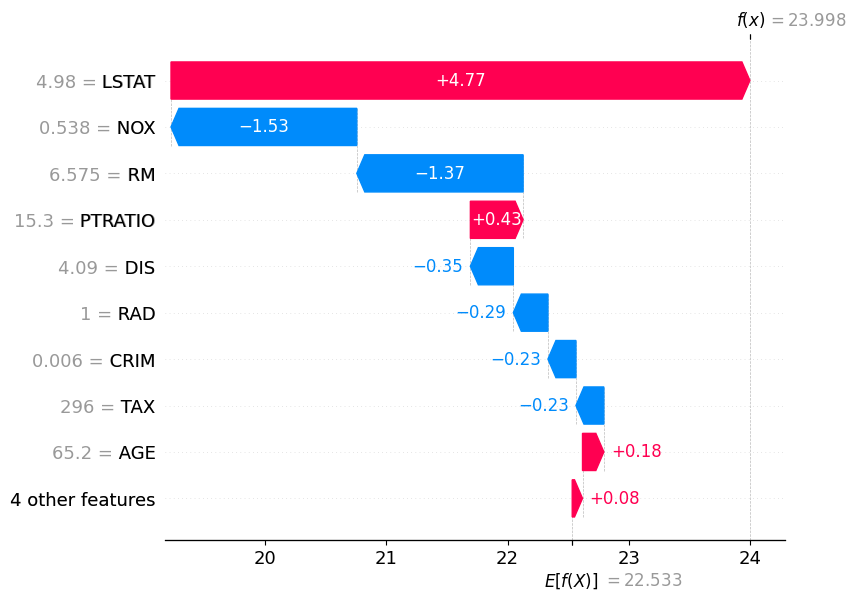

In [ ]:
import xgboost
import shap

# train an XGBoost model
X, y = df_features, df_target # Load data
model = xgboost.XGBRegressor().fit(X, y)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation with a waterfall plot
shap.plots.waterfall(shap_values[0])


On the y-axis, you can find the feature’s name and value

On the x-axis, you can find the base value E[f(X)] = 22.533 that indicates the average predicted values across the training set -- meaning this is the average of all the $model.predict(X)$, see below for verification.


In [ ]:
predictions = model.predict(X)

# Calculate the average prediction
average_prediction = np.mean(predictions)
average_prediction

22.532845


A red bar in this plot shows the feature’s positive contribution to the predicted value

A blue bar in this plot shows the feature’s negative contribution to the predicted value

The label on the bars indicates the deviation from the model’s base prediction value attributed to the parameter. For example, the AGE = 65.2 has marginally contributed +0.19 to the prediction’s deviation from the base value of 22.533

The bars are in descending order of the absolute importance of its impact on the predicted value

### Visual 2: Decision Plot, another way of representing the decision curve.

The bottom x-axis provides the model output and the trajectory from top to bottom gives a visual representation of how the the features are contributing from highest to lowest. This is another representation but has similar value as that of the Waterfall plot.

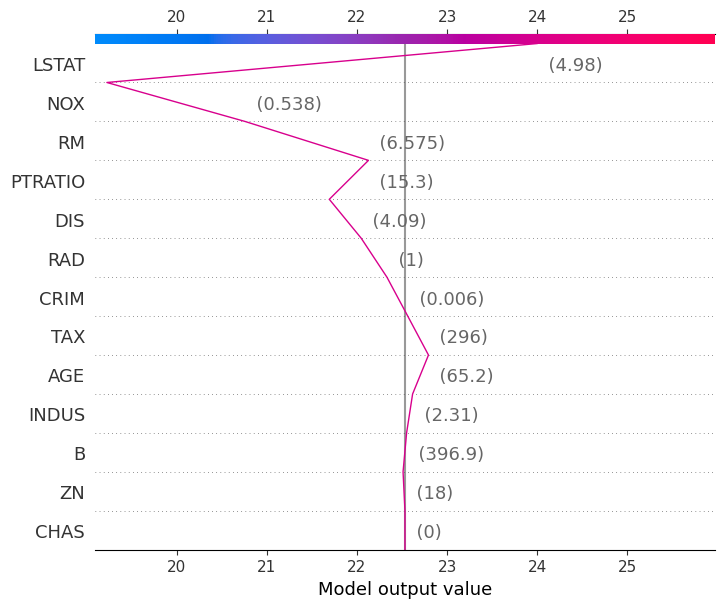

In [ ]:
# visualize the first prediction's explanation with a decision plot
shap.decision_plot(explainer.expected_value, shap_values.values[0], X.iloc[0], link='identity', show=True)

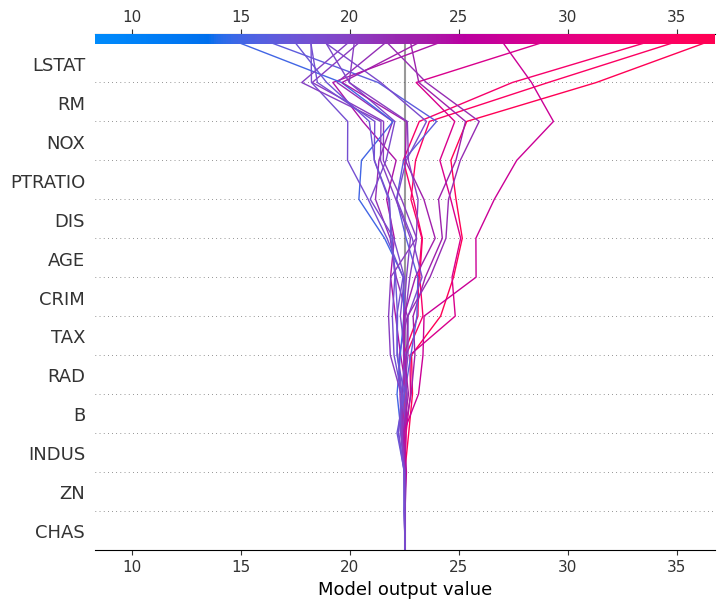

In [ ]:
# visualize the first prediction's explanation with a decision plot
shap.decision_plot(explainer.expected_value, shap_values.values[:20], X[:20], link='identity', show=True)

### Visual 3: The Force Plot

Yet, another way of representing the Decision curve!

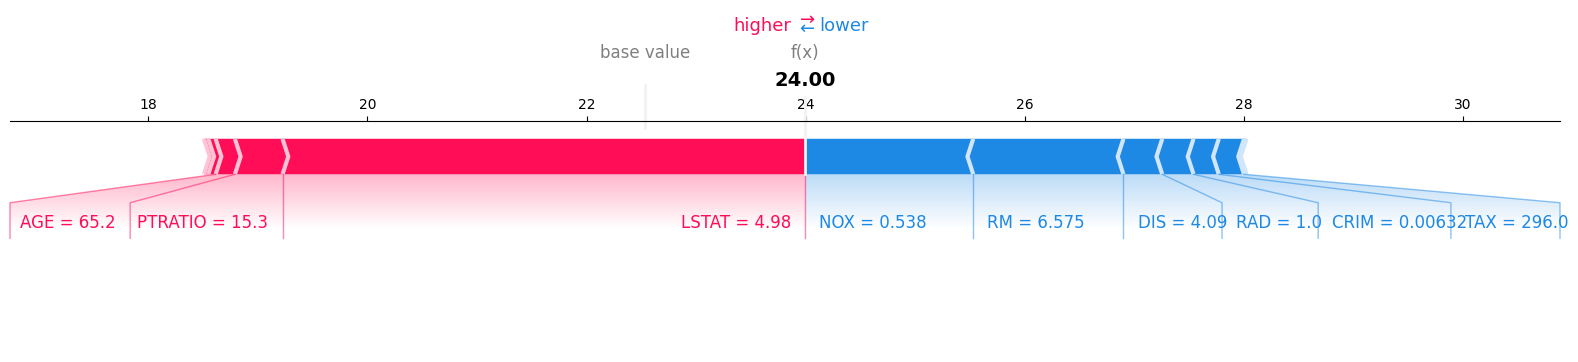

In [ ]:
shap.initjs()

shap.plots.force(shap_values[0], matplotlib=True)

### Visual 4: Global Explainability with SHAP

Global explainability can be understood as understanding the overall importance of each feature in the model across the entire dataset and providing a general knowledge of the data and the underlying patterns. Due to the fuzziness in decomposing individual predictions’ contributions and aggregating across the data, there is more than one way to attempt global explainability as will be shown in the next examples.

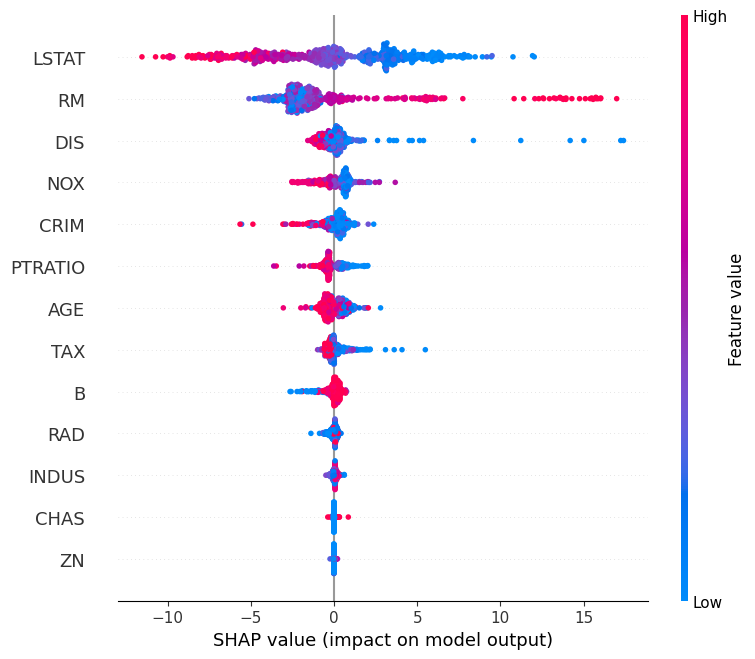

In [ ]:
# Summarize the effects of features
shap.summary_plot(shap_values, X)

Here are the important things to note when looking at this plot:

**Color Scale:** The color indicates the value of the feature, from low (blue) to high (red). For example, a high RM (average number of rooms) contributes positively to the target variable (house price), as indicated by the red dots with positive SHAP values.

**Impact on Model Output:** Points to the right of the zero line increase the prediction; points to the left decrease it. For instance, higher LSTAT (percentage of lower status population) values generally have SHAP values to the left, decreasing the predicted value (the house price).

**Density of Points:** The plot also shows the distribution of the SHAP values for each feature. A cluster of points along an axis indicates many instances with a similar SHAP value for that feature.

**Vertical Dispersion:** Each dot represents an individual data point (house) from the dataset. The vertical dispersion of the dots across a feature level shows the variance in the SHAP values for that feature, indicating that the feature has varying impacts on the model output depending on the context of other features.

From this plot, you can interpret which features are most important for the model's predictions and how each feature's value affects the prediction. It's a powerful tool for explainable AI, helping us understand the decision-making of complex models.

### Visual 5: Summary Plot

The value of this is more pronounced in Classification.

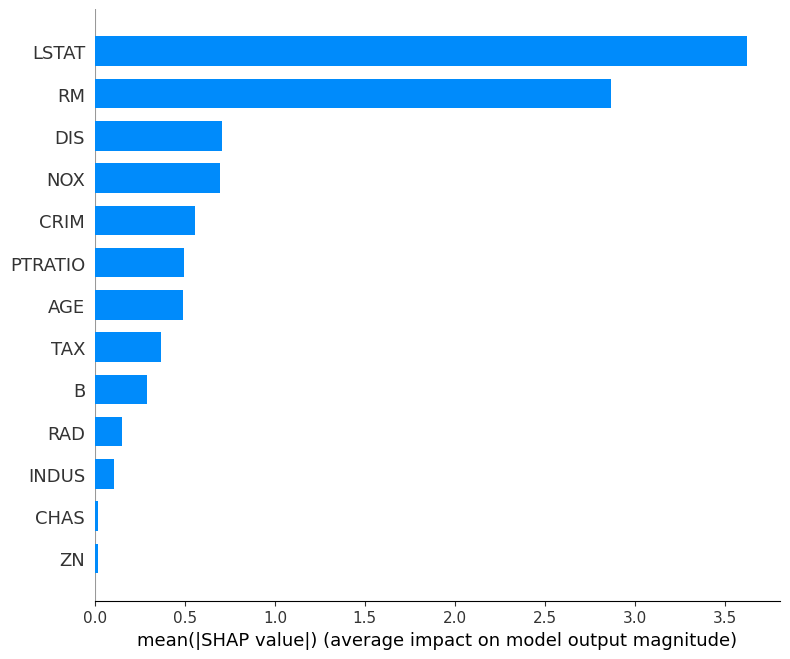

In [ ]:
shap.summary_plot(shap_values, X, plot_type="bar")

## Example 2. Welcome Back too, IRIS data set! SHAP in Classification Problems

In this example: A Random Forest classifier is trained on the training data (you should know this pipeline very well by now!). Then,

1. SHAP's TreeExplainer is used to explain the Random Forest model.
2. SHAP values are computed for the test set.

A summary plot is created to show the impact of each feature on the model's predictions.This code provides insights into how each feature of the Iris dataset (like petal length, petal width, etc.) influences the Random Forest model's classification decisions.

The shap.summary_plot function is particularly useful for visualizing the feature importance and understanding the model's behavior.

In [ ]:
import xgboost
import shap
import warnings
warnings.filterwarnings('ignore')

X, y = shap.datasets.iris()

model = xgboost.XGBRegressor().fit(X, y)

# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)

In [ ]:
X.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Visualize the First Prediction data point

### Visual 1: The Waterfall plot

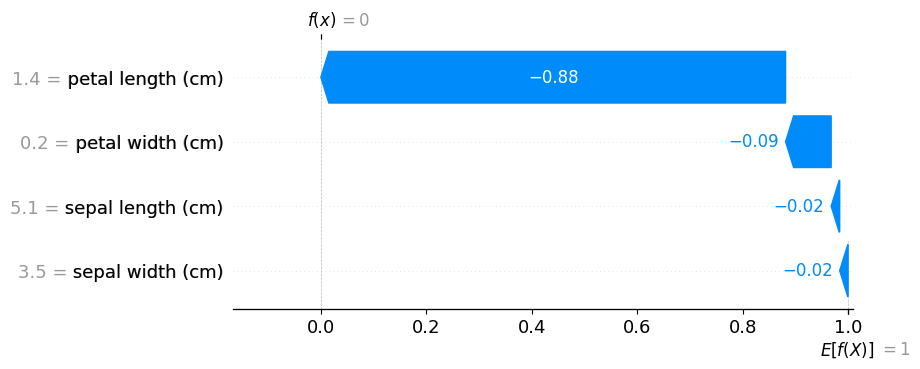

In [ ]:
shap.plots.waterfall(shap_values[0])

Once again,

On the y-axis, you can find the feature’s name and value

On the x-axis, you can find the base value E[f(X)] = 1.0 that indicates the average predicted values across the training set -- meaning this is the average of all the $model.predict(X)$, see below for verification.

In [ ]:
predictions = model.predict(X)

# Calculate the average prediction
average_prediction = np.mean(predictions)
average_prediction

1.0

A red bar in this plot shows the feature’s positive contribution to the predicted value

A blue bar in this plot shows the feature’s negative contribution to the predicted value

The label on the bars indicates the deviation from the model’s base prediction value attributed to the parameter. For example, the sepal width = 3.5 cm has marginally contributed -0.02 to the prediction’s deviation from the base value of 0

The bars are in descending order of the absolute importance of its impact on the predicted value

### Visual 2: Decision Plot, another way of representing the decision curve.

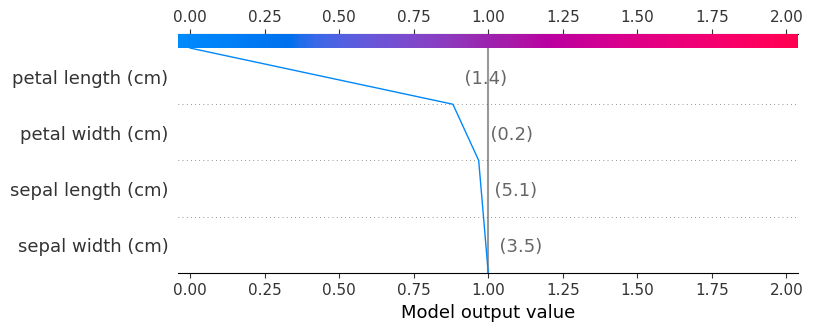

In [ ]:
# visualize the first prediction's explanation with a decision plot
shap.decision_plot(explainer.expected_value, shap_values.values[0], X.iloc[0], link='identity', show=True)

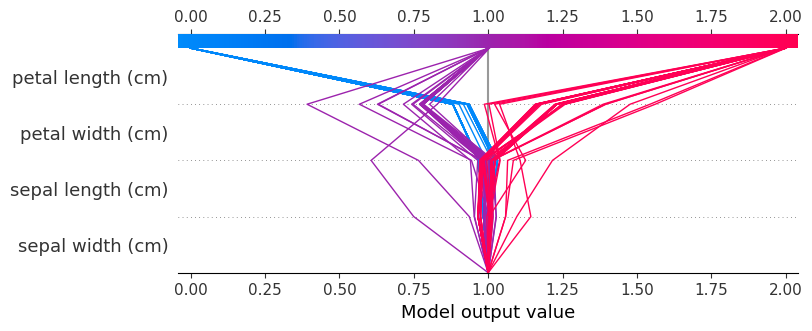

In [ ]:
# visualize the first prediction's explanation with a decision plot
shap.decision_plot(explainer.expected_value, shap_values.values[:200], X[:200], link='identity', show=True)

### Visual 3: The Force Plot

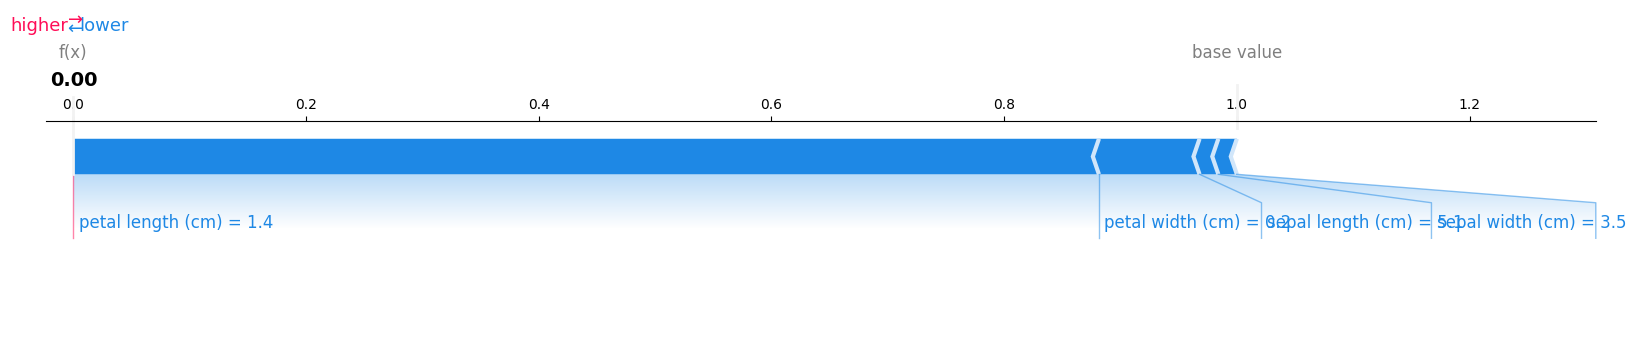

In [ ]:
shap.initjs()

shap.plots.force(shap_values[0], matplotlib=True)

### Visual 4:  Global Explainability with SHAP

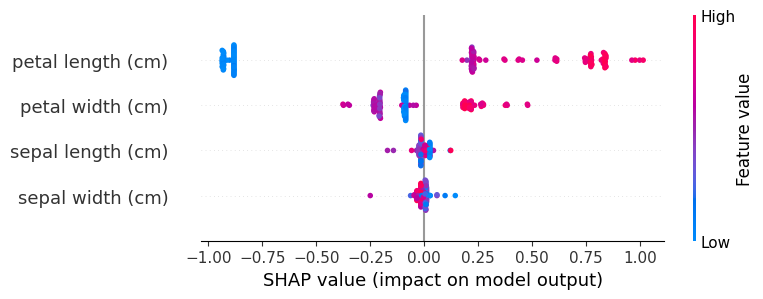

In [ ]:
# Summarize the effects of features
shap.summary_plot(shap_values, X)

###Visual 5: The Summary Plot

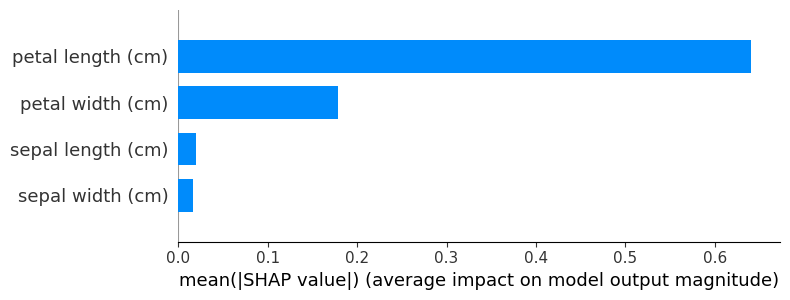

In [ ]:
# Summarize the effects of all the features
shap.summary_plot(shap_values, X, plot_type="bar")

The length of the bars indicates the mean absolute SHAP value for each feature, averaged over the dataset. The mean absolute SHAP value is a measure of the average impact of a feature on the model's output.

#**In-Class Activity: Let's learn together:** SHAPLey is a very versatile and useful tool for Interpretability

Your machine learning presentation will most likely revolve around finding a good problem and interpreting your results using SHAPley. In preparation for this, I want your group to choose a data so that everyone will have a buy-in. Run it using:

LT1: Decision Tree model, interpret it using model's mapping (modular, independent features assumption) and compare the interepretation with SHAP.

LT2, LT3: Linear models with or without regularization, interpret it using the method previously and again, compare with SHAP.

LT4, LT5: Random Forest model, interpret it using the method previously and compare with SHAP.

LT6, LT7:  Gradient Boosting a Based model, interpret it using the method previously and compare with SHAP,

## **Assignment 3** California Housing Data Set (per LT, due: 08 November 2024, 12 mn)

Your task is to interpret this data set using the Random Forest method by sampling the data set first and plotting the result as you increase the number of samples. Plot how the predictor variables change as you grow the sampling.

Details based here: https://www.kaggle.com/datasets/camnugent/california-housing-prices

This is the dataset used in the second chapter of Aurélien Géron's recent book 'Hands-On Machine learning with Scikit-Learn and TensorFlow'. It serves as an excellent introduction to implementing machine learning algorithms because it requires rudimentary data cleaning, has an easily understandable list of variables and sits at an optimal size between being to toyish and too cumbersome.

The data contains information from the 1990 California census. So although it may not help you with predicting current housing prices like the Zillow Zestimate dataset, it does provide an accessible introductory dataset for teaching people about the basics of machine learning. *italicized text*

The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. Be warned: (1) the data aren't cleaned so there are some preprocessing steps required! and (2) Relatively large sample (20640 samples with 8 features) and can take sometime to run Shapley that is based on factorial permutations!

The code below is a standard in our ML pipeline:

* 1. Get the Data;
* 2. Pre-process, Clean it;
* 3. Visualize the histogram as part of EDA;
* 4. Train a Random Forest Model;
* 5. Evaluate the Performance.

**WARNING:** Shapley's computational complexity grows geometrically fast. Expect the computation to be very long of you will not sample the system because of the sheer number of rows of data for this example.*

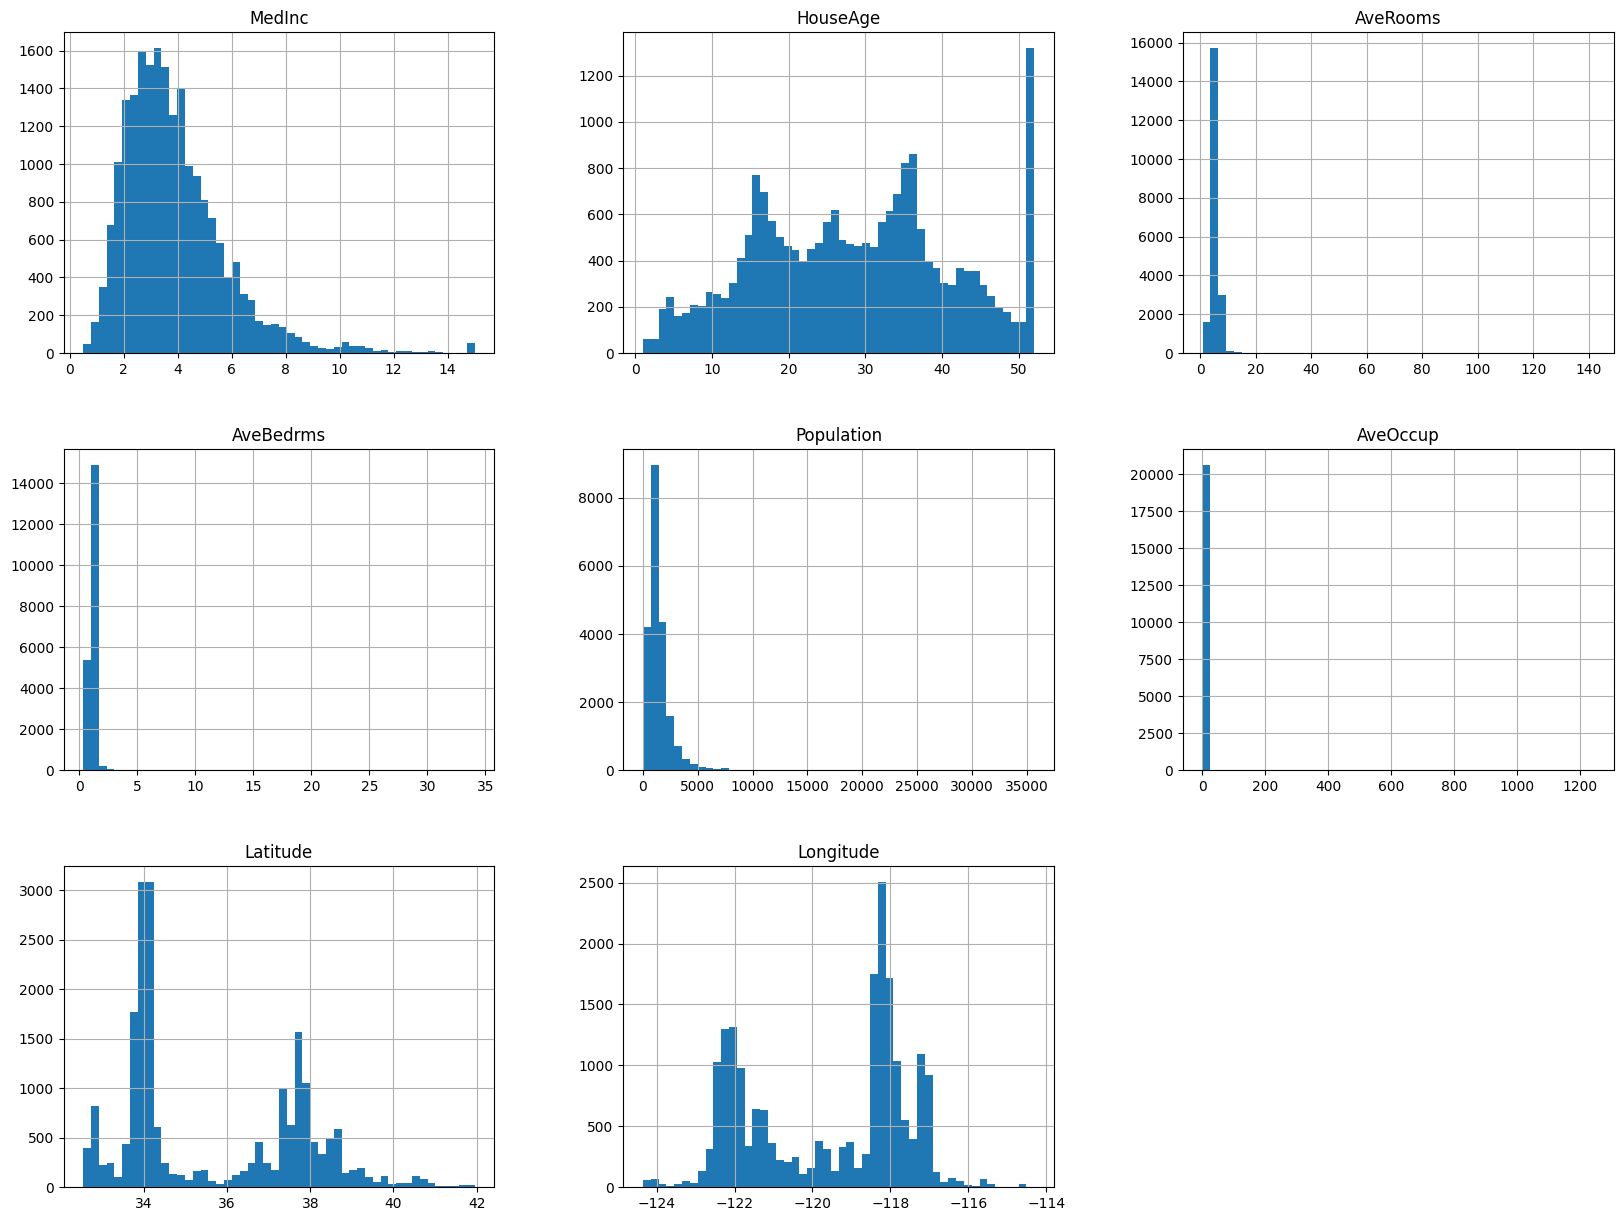

Mean Squared Error on Test Set: 0.2550924062982412


In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

# Load the dataset
california_data = fetch_california_housing()
X = pd.DataFrame(california_data.data, columns=california_data.feature_names)
y = pd.Series(california_data.target)

# Data Cleaning: Check for NaNs and fill or remove them if necessary
if X.isnull().values.any():
    X = X.fillna(X.mean())  # Replace NaNs with the mean of the column
if y.isnull().values.any():
    y = y.fillna(y.mean())  # Replace NaNs in the target variable

# Visualize data with histograms
X.hist(bins=50, figsize=(20, 15))
plt.show()

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Train a Random Forest Regressor model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Calculate and print the mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Set:", mse)



After we thrained the model, we used below the SHAP's TreeExplainer to explain the Random Forest model. SHAP values are then computed for the test set. Finally, A force plot is created for the first prediction in the test set, showing the contribution of each feature to the model's output.

# Appendix A: Shapley Formulation


# Shapley Value: Explanation and Mathematical Formulation

## General Concept

The Shapley value is a method in cooperative game theory for fairly allocating the total payoff to players based on their contribution. It involves a set of players \( N \) and a characteristic function \( v(S) \) which assigns a value to each coalition $ S \subseteq N $.

## Mathematical Formulation

For each player $ i $ in the set of players $N$, the Shapley value $ \phi_i(v) $ is given by the formula:

$$ \phi_i(v) = \sum_{S \subseteq N \setminus \{i\}} \frac{|S|! \cdot (|N|-|S|-1)!}{|N|!} \cdot \left( v(S \cup \{i\}) - v(S) \right) $$

### Variables and Terms

- \( N \): Set of all players.
- \( S \): A subset of \( N \) excluding player \( i \).
- \( |S| \): Number of players in subset \( S \).
- \( |N| \): Total number of players.
- \( v(S) \): Value of the coalition \( S \).
- \( $v(S \cup \{i\})$ \): Value of the coalition \( S \) including player \( i \).

### Formula Components

- **Summation ($\sum$)**: Computes the Shapley value as a sum over all subsets $S$ of $N$ excluding player $i$.
- **Fractional Multiplier**: The fraction $\frac{|S|! \cdot (|N|-|S|-1)!}{|N|!}$ calculates the proportion of all permutations where subset $ S $ forms before player $i $ joins.
- **Marginal Contribution**: $ v(S \cup \{i\}) - v(S) $ represents the additional value brought by player $ i $ to the coalition $ S$.

## Intuitive Understanding

- Averages the marginal contributions of a player to all possible coalitions they can join.
- Accounts for every possible order of coalition formation.
- Ensures a fair distribution based on each player's contribution to the collective effort.

The Shapley value is a balanced approach that captures each player's contribution to the group, regardless of the order in which they join the game.


# APPENDIX B. Resource for Costumizing SHAP (color pallette, etc).

You can costumize SHAP to your color preference by following the code guideline here: https://towardsdatascience.com/how-to-easily-customize-shap-plots-in-python-fdff9c0483f2

# APPENDIX C. Calculating SHAPley and the assumption of FAIRNESS

There are multiple valid ways to calculate Shapley values in different contexts, and the choice of method can depend on the specific problem you are addressing. Here are a few common approaches:

1. **Exact Shapley values:** These are calculated by considering all possible permutations of features and computing the marginal contributions of each feature in every permutation. This approach provides the most accurate Shapley values but can be computationally expensive, especially when dealing with a large number of features.

2. **Sampling-based methods:** Instead of considering all permutations, these methods estimate Shapley values by sampling a subset of permutations and averaging the contributions. Sampling methods, like Monte Carlo or kernel SHAP, are often more computationally efficient but may introduce some approximation error.

3. **Shapley approximation methods:** These approaches use various mathematical techniques, such as kernel methods, Taylor expansions, or optimization, to approximate Shapley values more efficiently than exact calculations. They aim to strike a balance between accuracy and computational cost.

4. **Model-specific methods:** Some machine learning models have their own specialized algorithms to compute Shapley values efficiently. For example, SHAP (SHapley Additive exPlanations) is a popular library that offers model-specific implementations for a wide range of models.

### Fairness assumptions

Shapley values can be used to assess the fairness of a machine learning model, but fairness assumptions may not always align with real-world scenarios due to several reasons:

1. **Data bias:** If the training data used to build the model is biased, Shapley values may reflect and perpetuate that bias. In such cases, fairness assumptions might not hold because the model's predictions are based on biased data.

2. **Feature representation:** The way features are represented or engineered can affect Shapley values. Unfair or biased representations of features can lead to unfairness in attributions, even if the model itself is fair.

3. **Contextual fairness:** Shapley values provide feature-level explanations, but fairness considerations often require a more holistic view, taking into account interactions between features and the broader context. Fairness assumptions may not adequately capture these nuances.

4. **External factors:** Real-world fairness issues can be influenced by external factors that are not captured by the model's features. Shapley values are limited to explaining the impact of model features and may not account for external factors that can introduce bias or unfairness.

It's essential to be aware of the limitations and assumptions of any fairness analysis, as they may not always align perfectly with real-world scenarios. Fairness in machine learning is an evolving field, and addressing it comprehensively often requires a combination of techniques and considerations.